<a href="https://colab.research.google.com/github/Aomaphisara/Basic-of-Data-Science/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Tutorial

Resources:
<br>
https://towardsdatascience.com/gentle-start-to-natural-language-processing-using-python-6e46c07addf3

In [ ]:
#!pip install nltk

In [1]:
import nltk

In [2]:
import urllib.request

In [4]:
# Grab a webpage from https://en.wikipedia.org/wiki/SpaceX
response =  urllib.request.urlopen('https://en.wikipedia.org/wiki/SpaceX') #บทความเกี่ยวกับผู้ผลิตจรวดและยานอวกาศ
response

HTML ย่อมาจาก Hyper Text Markup Language คือภาษาคอมพิวเตอร์ที่ใช้ในการแสดงผลของเอกสารบน website เป็นภาษาหลักที่ใช้ในการสร้างไฟล์เว็บเพจ

In [5]:
html = response.read()

In [6]:
type(html)

bytes

In [7]:
html

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>SpaceX - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-

In [9]:
# Use Beautiful Soup which is a Python library for pulling data out of HTML and XML files
from bs4 import BeautifulSoup
# สร้างตัวแปร soup เพื่อเก็บ HTML ที่ได้จาก response
soup = BeautifulSoup(html,'html5lib')
# ดึงข้อความทั้งหมดจาก HTML โดยตัดช่องว่างที่ไม่จำเป็น
text = soup.get_text(strip = True)

In [10]:
print(type(text))
text

<class 'str'>


'SpaceX - Wikipedia(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-toc-available";var cookie=document.cookie.match(/(?:^|; )enwikimwclientpreferences=([^;]+)/);if(cookie){cookie[1].split(\'%2C\').forEach(function(pref){className=className.replace(new RegExp(\'(^| )\'+pref.replace(/-clientpref-\\w+$|[^\\w-]+/g,\'\')+\'-clientpref-\\\\w+( |$)\'),\'$1\'+pref+\'$2\');});}document.documentElement.className=className;}());RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDa

In [11]:
# convert texts to tokens
# Tokenization is essentially splitting a phrase, sentence, paragraph,
#or an entire text document into smaller units, such as individual words or terms
# Each of these smaller units are called tokens
# แปลงข้อความเป็นโทเค็น
# Tokenization นั้นเป็นการแยกวลี ประโยค ย่อหน้า
# หรือเอกสารข้อความทั้งหมดเป็นหน่วยเล็กๆ เช่น คำหรือคำศัพท์แต่ละคำ
# แต่ละหน่วยเล็กๆ เหล่านี้เรียกว่าโทเค็น
tokens = [t for t in text.split()]
tokens

['SpaceX',
 '-',
 'Wikipedia(function(){var',
 'className="client-js',
 'vector-feature-language-in-header-enabled',
 'vector-feature-language-in-main-page-header-disabled',
 'vector-feature-sticky-header-disabled',
 'vector-feature-page-tools-pinned-disabled',
 'vector-feature-toc-pinned-clientpref-1',
 'vector-feature-main-menu-pinned-disabled',
 'vector-feature-limited-width-clientpref-1',
 'vector-feature-limited-width-content-enabled',
 'vector-feature-custom-font-size-clientpref-0',
 'vector-feature-client-preferences-disabled',
 'vector-feature-client-prefs-pinned-disabled',
 'vector-toc-available";var',
 'cookie=document.cookie.match(/(?:^|;',
 ")enwikimwclientpreferences=([^;]+)/);if(cookie){cookie[1].split('%2C').forEach(function(pref){className=className.replace(new",
 "RegExp('(^|",
 ")'+pref.replace(/-clientpref-\\w+$|[^\\w-]+/g,'')+'-clientpref-\\\\w+(",
 '|$)\'),\'$1\'+pref+\'$2\');});}document.documentElement.className=className;}());RLCONF={"wgBreakFrames":false,"wgSep

## Count Word Frequency

Stop Words คือ คำทั่ว ๆ ไป ที่เราพบบ่อย ๆ ในประโยค หรือ เอกสาร แต่ไม่ค่อยช่วยในการสื่อความหมายสักเท่าไร ทำให้เราสามารถลบคำเหล่านั้นออกไปจากรายการคำศัพท์ได้เลย กรองทิ้งไปจากเอกสารได้เลย เช่น a, an, the, also, just, quite, unless, etc. คำเหล่านี้เรียกว่า Stop Words

In [12]:
from nltk.corpus import stopwords
nltk.download('stopwords')
sr = stopwords.words('english')
clean_tokens = tokens[:]
# remove stop words
for token in tokens:
    if token in stopwords.words('english'):
        clean_tokens.remove(token)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
# Count word frequency
freq = nltk.FreqDist(clean_tokens)
for key,val in freq.items():
    print(str(key) + ':' + str(val))

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
"counter(listitem)"\a0:1
ol>li:first-child::before,.mw-parser-output:2
ol>li:first-child::before{content:":1
("counter(listitem)"\a0:1
.sidebar{width:22em;float:right;clear:right;margin:0.5em:1
0:5
1em:7
1em;background:#f8f9fa;border:1px:1
solid:8
#aaa;padding:0.2em;text-align:center;line-height:1.4em;font-size:88%;border-collapse:collapse;display:table}body.skin-minerva:1
.sidebar{display:table!important;float:right!important;margin:0.5em:1
1em!important}.mw-parser-output:1
.sidebar-subgroup{width:100%;margin:0;border-spacing:0}.mw-parser-output:1
.sidebar-left{float:left;clear:left;margin:0.5em:1
0}.mw-parser-output:5
.sidebar-none{float:none;clear:both;margin:0.5em:1
.sidebar-outer-title{padding:0:1
0.4em:6
0.2em;font-size:125%;line-height:1.2em;font-weight:bold}.mw-parser-output:1
.sidebar-top-image{padding:0.4em}.mw-parser-output:1
.sidebar-top-caption,.mw-parser-output:1
.sidebar-pretitle-with-top-image,.mw-parser-output:1


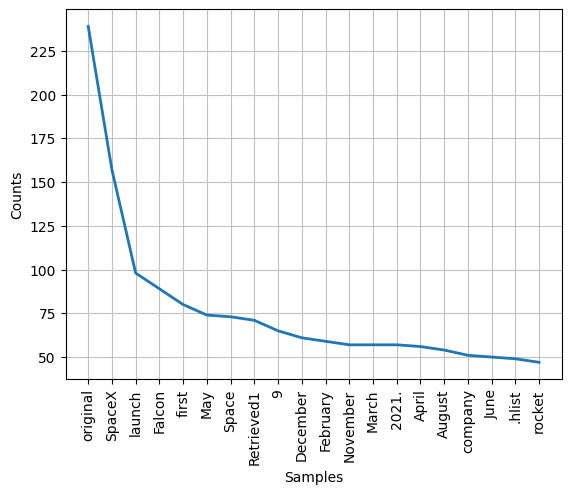

<Axes: xlabel='Samples', ylabel='Counts'>

In [14]:
freq.plot(20, cumulative=False)

In [15]:
print(["ya"]+stopwords.words('english'))

['ya', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'th

## Custom stop words

In [16]:
stopwords_default = stopwords.words('english')
print(len(stopwords_default))

179


In [ ]:
# add a word
stopwords_default.append('like')
print(len(stopwords_default))

# add multiple words
stopwords_default.extend(['marvel', 'ghost'])
print(len(stopwords_default))

180
182


## Stemming

Stemming & Lemmatization คือการลดรูปของคำๆเดียวกันให้อยู่ในรูปพื้นฐานของคำๆนั้น โดย Stemming และ Lemmatization มีความแตกต่างกันที่วิธีการลดรูป

การ Stemming: จะตัดส่วนท้ายของคำออกเพื่อให้เหลือแค่รากของคำนั้นๆ เช่น run, runs, running → run

In [17]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
# create an object of class PorterStemmer
ps = PorterStemmer()
ls = LancasterStemmer()

In [18]:
# choose some words to be stemmed
words = ["program", "programs", "programmer", "programming", "programmers"]

for w in words:
    print(w, " : ", ps.stem(w))

program  :  program
programs  :  program
programmer  :  programm
programming  :  program
programmers  :  programm


In [19]:
nltk.download('punkt')
sentence = "Programmers program with programming languages"
words = word_tokenize(sentence)

for w in words:
    print(w, " : ", ps.stem(w))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Programmers  :  programm
program  :  program
with  :  with
programming  :  program
languages  :  languag


In [21]:
words

['Programmers', 'program', 'with', 'programming', 'languages']

In [ ]:
# proide a word to be stemmed
print("Porter Stemmer")
print(ps.stem("cats"))
print(ps.stem("trouble"))
print(ps.stem("troubling"))
print(ps.stem("troubled"))
print("Lancaster Stemmer")
print(ls.stem("cats"))
print(ls.stem("trouble"))
print(ls.stem("troubling"))
print(ls.stem("troubled"))

Porter Stemmer
cat
troubl
troubl
troubl
Lancaster Stemmer
cat
troubl
troubl
troubl


In [22]:
# A list of words to be stemmed
word_list = ["friend", "friendship", "friends", "friendships", "stabil", "destabilize",
             "misunderstanding", "railroad", "moonlight", "football"]
print("{0:20}{1:20}{2:20}".format("Word","Porter Stemmer","lancaster Stemmer")) #จัดรูปแบบให้แต่ละคอลัมน์มีความกว้าง 20 ตัวอักษร
for word in word_list:
    print("{0:20}{1:20}{2:20}".format(word,ps.stem(word),ls.stem(word)))

Word                Porter Stemmer      lancaster Stemmer   
friend              friend              friend              
friendship          friendship          friend              
friends             friend              friend              
friendships         friendship          friend              
stabil              stabil              stabl               
destabilize         destabil            dest                
misunderstanding    misunderstand       misunderstand       
railroad            railroad            railroad            
moonlight           moonlight           moonlight           
football            footbal             footbal             


In [23]:
sentence = "Pythoners are very intelligent and work very pythonly and \
now they are pythoning their way to success."
ps.stem(sentence)

'pythoners are very intelligent and work very pythonly and now they are pythoning their way to success.'

In [24]:
def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(ps.stem(word))
        stem_sentence.append(" ")
        #print(stem_sentence)
    return "".join(stem_sentence)

print(stemSentence(sentence))

python are veri intellig and work veri pythonli and now they are python their way to success . 


## Lemmatization

Lemmatization คือการแปลงคำต่างๆ ให้อยู่ในรูปพื้นฐานของคำนั้นๆ เช่น is, am, are → be

In [25]:
from nltk.stem import WordNetLemmatizer
wl = WordNetLemmatizer()

In [26]:
nltk.download('wordnet')
sentence = "Programmers program with programming languages"
tokenization = nltk.word_tokenize(sentence)
for w in tokenization:
    print("Lemma for {} is {}".format(w, wl.lemmatize(w)))

[nltk_data] Downloading package wordnet to /root/nltk_data...


Lemma for Programmers is Programmers
Lemma for program is program
Lemma for with is with
Lemma for programming is programming
Lemma for languages is language


In [27]:
words = ["program", "programs", "programmer", "programming", "programmers"]
for w in words:
    print(w, " : ", wl.lemmatize(w))

program  :  program
programs  :  program
programmer  :  programmer
programming  :  programming
programmers  :  programmer


In [28]:
sentence = "Pythoners are very intelligent and work very pythonly and \
now they are pythoning their way to success."
def lemmaSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    lemma_sentence=[]
    for word in token_words:
        lemma_sentence.append(wl.lemmatize(word))
        lemma_sentence.append(" ")
    return "".join(lemma_sentence)

print(lemmaSentence(sentence))

Pythoners are very intelligent and work very pythonly and now they are pythoning their way to success . 


In [29]:
for item in ['am' ,'are' ,'is','was','were']:
    print(wl.lemmatize(item),end='\t')

am	are	is	wa	were	

In [30]:
for item in ['am' ,'are' ,'is','was','were']:
    print(wl.lemmatize(item,pos='v'),end='\t')

be	be	be	be	be	

`pos='v'` means we set lemmatizer pos tag manually as verb(‘v’), otherwise it would have taken ’n’ → noun as default

(`pos='v'' หมายความว่าเราตั้งค่าแท็ก pos ของ lemmatizer ด้วยตนเองเป็น verb('v') ไม่เช่นนั้นก็จะต้องใช้ 'n' → noun เป็นค่าเริ่มต้น)

We can automatically set pos tag of words using `nltk.pos_tag`

In [31]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wl = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [32]:
from nltk.corpus import wordnet
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].lower()
    tag_dict = {"a": wordnet.ADJ,
                "n": wordnet.NOUN,
                "v": wordnet.VERB,
                "r": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [33]:
nltk.download('averaged_perceptron_tagger')
for items in ['best', 'well','better']+['be', 'was','were', 'is', 'am']:
    print(f"{items:<6} --> {wl.lemmatize(items, pos=get_wordnet_pos(items)):<4}, tag="+get_wordnet_pos(items), end='\n')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


best   --> best, tag=n
well   --> well, tag=r
better --> well, tag=r
be     --> be  , tag=v
was    --> be  , tag=v
were   --> be  , tag=v
is     --> be  , tag=v
am     --> be  , tag=v


Comparing stemming and lemmatization \
https://www.analyticsvidhya.com/blog/2022/06/stemming-vs-lemmatization-in-nlp-must-know-differences/#

In [34]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [35]:
paragraph = """
    I have three visions for India. In 3000 years of our history,
    people from all over the world have come and invaded us, captured our lands,
    conquered our minds. From Alexander onwards, the Greeks, the Turks, the Moguls,
    the Portuguese, the British, the French, the Dutch, all of them came and looted us,
    took over what was ours. Yet we have not done this to any other nation.
    We have not conquered anyone. We have not grabbed their land, their culture,
    their history and tried to enforce our way of life on them.
    """

In [36]:
sentences = nltk.sent_tokenize(paragraph)
print(sentences)

print("\n\n Result after Stemming \n\n")
stemmer = nltk.PorterStemmer()
# Stemming
for i in range(len(sentences)):
    words = nltk.word_tokenize(sentences[i])
    words = [stemmer.stem(word) for word in words if word not in set(stopwords.words('english'))]
    sentences[i] = ' '.join(words)
print(sentences)

sentences = nltk.sent_tokenize(paragraph)
print("\n\n Result after Lammatizing \n\n")
lemmatizer = WordNetLemmatizer()
# Lemmatization
for i in range(len(sentences)):
    words = nltk.word_tokenize(sentences[i])
    words = [lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
    sentences[i] = ' '.join(words)
print(sentences)

['\n    I have three visions for India.', 'In 3000 years of our history,\n    people from all over the world have come and invaded us, captured our lands,\n    conquered our minds.', 'From Alexander onwards, the Greeks, the Turks, the Moguls,\n    the Portuguese, the British, the French, the Dutch, all of them came and looted us,\n    took over what was ours.', 'Yet we have not done this to any other nation.', 'We have not conquered anyone.', 'We have not grabbed their land, their culture,\n    their history and tried to enforce our way of life on them.']


 Result after Stemming 


['i three vision india .', 'in 3000 year histori , peopl world come invad us , captur land , conquer mind .', 'from alexand onward , greek , turk , mogul , portugues , british , french , dutch , came loot us , took .', 'yet done nation .', 'we conquer anyon .', 'we grab land , cultur , histori tri enforc way life .']


 Result after Lammatizing 


['I three vision India .', 'In 3000 year history , people wo

# Text Similarity

In [37]:
doc_1 = "Data is the oil of the digital economy"
doc_2 = "Data is a new oil"

# Count vector representation of the document
#["data", "digital", "economy", "is", "new", "of", "oil", "the"]
doc_1_vector = [1, 1, 1, 1, 0, 1, 1, 2]
doc_2_vector = [1, 0, 0, 1, 1, 0, 1, 0]

![](https://studymachinelearning.com/wp-content/uploads/2019/09/cosine_similarity_example_1.png)

In [38]:
data = [doc_1, doc_2]

In [ ]:
# !pip install --upgrade pip
# !pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


Using wordcount

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
vector_matrix = count_vectorizer.fit_transform(data)
vector_matrix

<2x8 sparse matrix of type '<class 'numpy.int64'>'
	with 11 stored elements in Compressed Sparse Row format>

In [ ]:
tokens = count_vectorizer.get_feature_names_out()
tokens

array(['data', 'digital', 'economy', 'is', 'new', 'of', 'oil', 'the'],
      dtype=object)

In [ ]:
vector_matrix.toarray()

array([[1, 1, 1, 1, 0, 1, 1, 2],
       [1, 0, 0, 1, 1, 0, 1, 0]])

In [ ]:
import pandas as pd

def create_dataframe(matrix, tokens):
    doc_names = [f'doc_{i+1}' for i, _ in enumerate(matrix)]
    df = pd.DataFrame(data=matrix, index=doc_names, columns=tokens)
    return(df)

In [ ]:
create_dataframe(vector_matrix.toarray(),tokens)

,data,digital,economy,is,new,of,oil,the
doc_1,1,1,1,1,0,1,1,2
doc_2,1,0,0,1,1,0,1,0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity_matrix = cosine_similarity(vector_matrix)
create_dataframe(cosine_similarity_matrix,['doc_1','doc_2'])

,doc_1,doc_2
doc_1,1.000000,0.474342
doc_2,0.474342,1.000000


Using TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

Tfidf_vect = TfidfVectorizer()
vector_matrix = Tfidf_vect.fit_transform(data)

tokens = Tfidf_vect.get_feature_names_out()
create_dataframe(vector_matrix.toarray(),tokens)

,data,digital,economy,is,new,of,oil,the
doc_1,0.243777,0.34262,0.34262,0.243777,0.000000,0.34262,0.243777,0.68524
doc_2,0.448321,0.00000,0.00000,0.448321,0.630099,0.00000,0.448321,0.00000


In [ ]:
cosine_similarity_matrix = cosine_similarity(vector_matrix)
create_dataframe(cosine_similarity_matrix,['doc_1','doc_2'])

,doc_1,doc_2
doc_1,1.000000,0.327871
doc_2,0.327871,1.000000


# Text Summarization
https://www.geeksforgeeks.org/python-text-summarizer/

In [ ]:
# importing libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

# Input text - to summarize
text = """There are many techniques available to generate extractive summarization to keep it simple, I will be using an unsupervised learning approach to find the sentences similarity and rank them. Summarization can be defined as a task of producing a concise and fluent summary while preserving key information and overall meaning. One benefit of this will be, you don’t need to train and build a model prior start using it for your project. It’s good to understand Cosine similarity to make the best use of the code you are going to see. Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them. Its measures cosine of the angle between vectors. The angle will be 0 if sentences are similar."""

print(text)

There are many techniques available to generate extractive summarization to keep it simple, I will be using an unsupervised learning approach to find the sentences similarity and rank them. Summarization can be defined as a task of producing a concise and fluent summary while preserving key information and overall meaning. One benefit of this will be, you don’t need to train and build a model prior start using it for your project. It’s good to understand Cosine similarity to make the best use of the code you are going to see. Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them. Its measures cosine of the angle between vectors. The angle will be 0 if sentences are similar.


In [ ]:
# Tokenizing the text
nltk.download('stopwords')
stopWords = set(stopwords.words("english"))
words = word_tokenize(text)

words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['There',
 'are',
 'many',
 'techniques',
 'available',
 'to',
 'generate',
 'extractive',
 'summarization',
 'to',
 'keep',
 'it',
 'simple',
 ',',
 'I',
 'will',
 'be',
 'using',
 'an',
 'unsupervised',
 'learning',
 'approach',
 'to',
 'find',
 'the',
 'sentences',
 'similarity',
 'and',
 'rank',
 'them',
 '.',
 'Summarization',
 'can',
 'be',
 'defined',
 'as',
 'a',
 'task',
 'of',
 'producing',
 'a',
 'concise',
 'and',
 'fluent',
 'summary',
 'while',
 'preserving',
 'key',
 'information',
 'and',
 'overall',
 'meaning',
 '.',
 'One',
 'benefit',
 'of',
 'this',
 'will',
 'be',
 ',',
 'you',
 'don',
 '’',
 't',
 'need',
 'to',
 'train',
 'and',
 'build',
 'a',
 'model',
 'prior',
 'start',
 'using',
 'it',
 'for',
 'your',
 'project',
 '.',
 'It',
 '’',
 's',
 'good',
 'to',
 'understand',
 'Cosine',
 'similarity',
 'to',
 'make',
 'the',
 'best',
 'use',
 'of',
 'the',
 'code',
 'you',
 'are',
 'going',
 'to',
 'see',
 '.',
 'Cosine',
 'similarity',
 'is',
 'a',
 'measure',
 'o

In [ ]:
# Creating a frequency table to keep the
# score of each word
freqTable = dict()
for word in words:
    word = word.lower()
    if word in stopWords:
        continue
    if word in freqTable:
        freqTable[word] += 1
    else:
        freqTable[word] = 1
freqTable

{'many': 1,
 'techniques': 1,
 'available': 1,
 'generate': 1,
 'extractive': 1,
 'summarization': 2,
 'keep': 1,
 'simple': 1,
 ',': 2,
 'using': 2,
 'unsupervised': 1,
 'learning': 1,
 'approach': 1,
 'find': 1,
 'sentences': 2,
 'similarity': 4,
 'rank': 1,
 '.': 7,
 'defined': 1,
 'task': 1,
 'producing': 1,
 'concise': 1,
 'fluent': 1,
 'summary': 1,
 'preserving': 1,
 'key': 1,
 'information': 1,
 'overall': 1,
 'meaning': 1,
 'one': 1,
 'benefit': 1,
 '’': 2,
 'need': 1,
 'train': 1,
 'build': 1,
 'model': 1,
 'prior': 1,
 'start': 1,
 'project': 1,
 'good': 1,
 'understand': 1,
 'cosine': 4,
 'make': 1,
 'best': 1,
 'use': 1,
 'code': 1,
 'going': 1,
 'see': 1,
 'measure': 1,
 'two': 1,
 'non-zero': 1,
 'vectors': 2,
 'inner': 1,
 'product': 1,
 'space': 1,
 'measures': 2,
 'angle': 3,
 '0': 1,
 'similar': 1}

In [ ]:
sentences = sent_tokenize(text)
sentences

['There are many techniques available to generate extractive summarization to keep it simple, I will be using an unsupervised learning approach to find the sentences similarity and rank them.',
 'Summarization can be defined as a task of producing a concise and fluent summary while preserving key information and overall meaning.',
 'One benefit of this will be, you don’t need to train and build a model prior start using it for your project.',
 'It’s good to understand Cosine similarity to make the best use of the code you are going to see.',
 'Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them.',
 'Its measures cosine of the angle between vectors.',
 'The angle will be 0 if sentences are similar.']

In [ ]:
# Creating a dictionary to keep the score
# of each sentence
sentenceValue = dict()

for sentence in sentences:
    for word, freq in freqTable.items():
        if word in sentence.lower():
            if sentence in sentenceValue:
                sentenceValue[sentence] += freq
            else:
                sentenceValue[sentence] = freq

sentenceValue

{'There are many techniques available to generate extractive summarization to keep it simple, I will be using an unsupervised learning approach to find the sentences similarity and rank them.': 32,
 'Summarization can be defined as a task of producing a concise and fluent summary while preserving key information and overall meaning.': 20,
 'One benefit of this will be, you don’t need to train and build a model prior start using it for your project.': 22,
 'It’s good to understand Cosine similarity to make the best use of the code you are going to see.': 26,
 'Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them.': 29,
 'Its measures cosine of the angle between vectors.': 19,
 'The angle will be 0 if sentences are similar.': 14}

In [ ]:
sumValues = 0
for sentence in sentenceValue:
    sumValues += sentenceValue[sentence]

# Average value of a sentence from the original text
average = int(sumValues / len(sentenceValue))
average

23

In [ ]:
# Storing sentences into our summary.
summary = ''
for sentence in sentences:
    if (sentence in sentenceValue) and (sentenceValue[sentence] > (1.2 * average)):
        summary += " " + sentence
print(summary)

 There are many techniques available to generate extractive summarization to keep it simple, I will be using an unsupervised learning approach to find the sentences similarity and rank them. Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them.


# Word2Vec

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim
from gensim.models import Word2Vec
import nltk
nltk.download('punkt')

rev = pd.read_csv('/content/drive/MyDrive/Classroom/SC663405 Basic of Data Science 1/Reviews.csv')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
rev

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [ ]:
rev[:1000]['Text']

0      I have bought several of the Vitality canned d...
1      Product arrived labeled as Jumbo Salted Peanut...
2      This is a confection that has been around a fe...
3      If you are looking for the secret ingredient i...
4      Great taffy at a great price.  There was a wid...
                             ...                        
995    BLACK MARKET HOT SAUCE IS WONDERFUL.... My hus...
996    Man what can i say, this salsa is the bomb!! i...
997    this sauce is so good with just about anything...
998    Not hot at all. Like the other low star review...
999    I have to admit, I was a sucker for the large ...
Name: Text, Length: 1000, dtype: object

In [ ]:
corpus_text = ' '.join(rev[:1000]['Text'])
data = []
# iterate through each sentence in the file
for i in sent_tokenize(corpus_text):
    temp = []
    # tokenize the sentence into words
    for j in word_tokenize(i):
        temp.append(j.lower())
    data.append(temp)

In [ ]:
corpus_text

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most. Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo". This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis\' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch. If you are looking for the secret

In [ ]:
data

[['i',
  'have',
  'bought',
  'several',
  'of',
  'the',
  'vitality',
  'canned',
  'dog',
  'food',
  'products',
  'and',
  'have',
  'found',
  'them',
  'all',
  'to',
  'be',
  'of',
  'good',
  'quality',
  '.'],
 ['the',
  'product',
  'looks',
  'more',
  'like',
  'a',
  'stew',
  'than',
  'a',
  'processed',
  'meat',
  'and',
  'it',
  'smells',
  'better',
  '.'],
 ['my',
  'labrador',
  'is',
  'finicky',
  'and',
  'she',
  'appreciates',
  'this',
  'product',
  'better',
  'than',
  'most',
  '.'],
 ['product',
  'arrived',
  'labeled',
  'as',
  'jumbo',
  'salted',
  'peanuts',
  '...',
  'the',
  'peanuts',
  'were',
  'actually',
  'small',
  'sized',
  'unsalted',
  '.'],
 ['not',
  'sure',
  'if',
  'this',
  'was',
  'an',
  'error',
  'or',
  'if',
  'the',
  'vendor',
  'intended',
  'to',
  'represent',
  'the',
  'product',
  'as',
  '``',
  'jumbo',
  "''",
  '.'],
 ['this',
  'is',
  'a',
  'confection',
  'that',
  'has',
  'been',
  'around',
  'a',
 

In [ ]:
model1 = gensim.models.Word2Vec(data, min_count = 1, vector_size = 20, sg = 0) # CBOW
model2 = gensim.models.Word2Vec(data, min_count = 1, vector_size = 20, sg = 1) # Skip-grams

In [ ]:
model1

In [ ]:
model1.wv.key_to_index

{'.': 0,
 'the': 1,
 ',': 2,
 'i': 3,
 'and': 4,
 'a': 5,
 'to': 6,
 'it': 7,
 'of': 8,
 'is': 9,
 '>': 10,
 '<': 11,
 '/': 12,
 'br': 13,
 'this': 14,
 'in': 15,
 'for': 16,
 '!': 17,
 'are': 18,
 'my': 19,
 'that': 20,
 'you': 21,
 'they': 22,
 'have': 23,
 'these': 24,
 'with': 25,
 'but': 26,
 'chips': 27,
 'not': 28,
 'was': 29,
 "'s": 30,
 "n't": 31,
 'as': 32,
 'on': 33,
 'like': 34,
 'them': 35,
 'so': 36,
 ')': 37,
 'good': 38,
 'at': 39,
 '(': 40,
 'or': 41,
 'be': 42,
 'great': 43,
 'do': 44,
 'all': 45,
 'taste': 46,
 'we': 47,
 'flavor': 48,
 'very': 49,
 'one': 50,
 'if': 51,
 'just': 52,
 'had': 53,
 'love': 54,
 'can': 55,
 'food': 56,
 'from': 57,
 'has': 58,
 "''": 59,
 'product': 60,
 'when': 61,
 'will': 62,
 'than': 63,
 'other': 64,
 'were': 65,
 'bag': 66,
 'more': 67,
 'tea': 68,
 'kettle': 69,
 'me': 70,
 'best': 71,
 'too': 72,
 'out': 73,
 'some': 74,
 'would': 75,
 'really': 76,
 'no': 77,
 '``': 78,
 "'ve": 79,
 'about': 80,
 'get': 81,
 'buy': 82,
 'much':

In [ ]:
vec_food = model1.wv['food']
vec_food

array([-1.0107191 ,  0.39785945,  1.2664118 ,  0.9908612 , -0.27711925,
        0.00827821, -0.10089556,  1.4669536 , -0.6689591 ,  0.25739753,
        1.2811697 , -0.786389  ,  0.40723884, -0.6750401 ,  2.3680496 ,
        0.79089946,  2.292473  , -0.6872341 , -0.9096557 , -1.4127325 ],
      dtype=float32)

In [ ]:
print("Cosine similarity between 'food' " + "and 'oatmeal' - CBOW : ", model1.wv.similarity('food', 'oatmeal'))
print("Cosine similarity between 'food' " + "and 'oatmeal' - Skipgrams : ", model2.wv.similarity('food', 'oatmeal'))

Cosine similarity between 'food' and 'oatmeal' - CBOW :  0.9955445
Cosine similarity between 'food' and 'oatmeal' - Skipgrams :  0.90687805


In [ ]:
print("Cosine similarity between 'food' " + "and 'car' - CBOW : ", model1.wv.similarity('food', 'car'))
print("Cosine similarity between 'food' " + "and 'car' - Skipgrams : ", model2.wv.similarity('food', 'car'))

Cosine similarity between 'food' and 'car' - CBOW :  0.94212747
Cosine similarity between 'food' and 'car' - Skipgrams :  0.7964576


In [ ]:
model1.wv.most_similar('food', topn=10)

[('chip', 0.9989858865737915),
 ('foods', 0.998736560344696),
 ('loves', 0.9986995458602905),
 ('out', 0.9985649585723877),
 ('which', 0.9985228776931763),
 ('my', 0.9984952807426453),
 ('up', 0.9983745217323303),
 ('.', 0.998359739780426),
 ('one', 0.9982474446296692),
 ('new', 0.998140275478363)]